# LoRaSim
Versão simplificada  e adaptada de um simulador de LoRaWAN desenvolvido por [Bor e Voigt](https://www.lancaster.ac.uk/scc/sites/lora/lorasim.html). 

# Setup Inicial

In [1]:
%%capture
! pip install -r requirements.txt
import loraDirMulBS as LoRaSim
import plots


# Simulações

Outras possíveis configurações de transmissão para os experimentos são: 

    0: SF12, BW125, CR4/8, um canal de frequência
    1: SF7, BW125, CR4/8, um canal de frequência
    2: Tempo no ar dos pacotes otimizado de acordo com a distância ao GW

## Exemplo 1

O primeiro experimento simula uma rede com 150 dispositivos dispostos em uma área circular de raio 5 km e 1 GW central. 
- Os dispositivos compartilham um canal de frequência e transmitem pacotes utilizando SF 12, com largura de banda 125 kHz (BW125), taxa de correção de erro 4/8 (CR48) e potência de transmissão Pt= 14 dBm. 
- Cada dispositivo transmite depois de um tempo aleatório tirado de uma distribuição exponencial com média 1000 s. A simulação dura 24 h de tempo simulado. 
- Como na primeira célula, clique no ícone de play(ou tecle shift+enter). 
- Observe o resultado clicando duas vezes no arquivo exp0.csv que foi criado com o resultado da simulação.


In [8]:
%%capture
# Nesta célula a seleção dos parâmetros e a simulação acontecem
# Os dispositivos compartilham um canal de frequência e transmitem pacotes utilizando:
# =================== CONFIGURAÇÃO 0 =================== 
# SF 12 
# com largura de banda 125 kHz (BW125)
# taxa de correção de erro 4/8 (CR48)
# potência de transmissão Pt= 14 dBm.


NumeroUsuarios = 150
TempoEntreTransmissoes = 1000 # (segundos)
Configuração = 0
TempoSimulacao = 24 # (horas)
NumeroDeGateways = 1 # (1..4, 6, 8, 24)
DistanciaMaximaAteGateway = 5000 # (m), maior que 1000 m
 
LoRaSim.simulation([_, NumeroUsuarios, TempoEntreTransmissoes,
              Configuração, TempoSimulacao, NumeroDeGateways,
              True, DistanciaMaximaAteGateway])

-------------------------------------
- Altere a variável Configuração para 1. 
  - Agora, todos os dispositivos transmitirão com SF7, BW125 e CR48. 

In [9]:
%%capture
# Nesta célula a seleção dos parâmetros e a simulação acontecem

# Altere a variável Configuração para 1. 
# Agora, todos os dispositivos transmitirão com: 
# =================== CONFIGURAÇÃO 1 =================== 
# SF 7 
# com largura de banda 125 kHz (BW125)
# taxa de correção de erro 4/8 (CR48)
# potência de transmissão Pt= 14 dBm.


NumeroUsuarios = 150
TempoEntreTransmissoes = 1000 # (segundos)
Configuração = 1 
TempoSimulacao = 24 # (horas)
NumeroDeGateways = 1 # (1..4, 6, 8, 24)
DistanciaMaximaAteGateway = 5000 # (m), maior que 1000 m
 
LoRaSim.simulation([_, NumeroUsuarios, TempoEntreTransmissoes,
              Configuração, TempoSimulacao, NumeroDeGateways,
              True, DistanciaMaximaAteGateway])

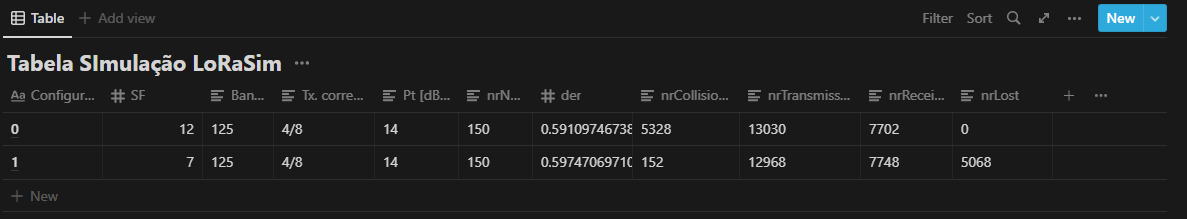

- O resultado da simulação, no arquivo exp1.csv, é muito diferente do caso anterior? 
  A maioria dos parâmetros resultaram em valores próximos, exceto pelos seguintes:
    - Nª de colisões: config_0 = 5328 | config_1 = 152
    - Nº de perdas: config_0 = 0 | config_1 = 5068
- Analise a origem dos erros de comunicação, são na sua maioria de colisão de pacotes? Compare com o resultado da Configuração 0.
  - Nota-se claramente que as perdas não são devido ao número de colisões, pois na configuração 1 onde tivemos 5068 perdas, obtivemos apenas 152  colisões, enquanto na configuração 0, se teve 5328 colisões (34x a mais) porém NENHUMA PERDA.

## Exemplo 2

-------------------------------
No caso da Configuração 2, a alocação dos SFs é feita de forma a minimizar o tempo no ar dos pacotes, mas tentando evitar que o pacote seja perdido por atenuação. 
- Então, a combinação de parâmetros de transmissão que ocupa o canal por menos tempo é selecionada.
- Um novo arquivo, sf_pct.csv, indicará o quanto cada SF será utilizado.  
- Ao rodar apróxima célula, uma figura mostrando a distribuição de SF de acordo com a distância ao GW será gerada. 
- Compare o resultado desta configuração (no arquivo exp2.csv) com os da Configuração = 0 e da Configuração = 1.

In [11]:
%%capture
# Nesta célula a seleção dos parâmetros e a simulação acontecem

# Altere a variável Configuração para 1. 
# Agora, todos os dispositivos transmitirão com: 
# =================== CONFIGURAÇÃO 2 =================== 
# SF 7, 8, 9, 10, 11 e 12
# com largura de banda 125 kHz (BW125)
# taxa de correção de erro 4/8 (CR48)
# potência de transmissão Pt= 14 dBm.


NumeroUsuarios = 150
TempoEntreTransmissoes = 1000 # (segundos)
Configuração = 2 
TempoSimulacao = 24 # (horas)
NumeroDeGateways = 1 # (1..4, 6, 8, 24)
DistanciaMaximaAteGateway = 5000 # (m), maior que 1000 m
 
LoRaSim.simulation([_, NumeroUsuarios, TempoEntreTransmissoes,
              Configuração, TempoSimulacao, NumeroDeGateways,
              True, DistanciaMaximaAteGateway])

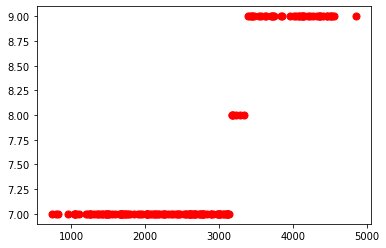

In [12]:
# Plota distribuição de SF e BW de acordo com a distância ao GW

plots.plot_distances_SF('sf_distance.csv')

# Tarefa

Varie para as diferentes configurações:
- o número de dispositivos
- o tempo entre transmissões
- a distância ao GW.


## Variando número de dispositivos

### 300 dispositivos

In [13]:
%%capture
# Nesta célula a seleção dos parâmetros e a simulação acontecem

# Altere a variável Configuração para 1. 
# Agora, todos os dispositivos transmitirão com: 
# =================== CONFIGURAÇÃO 2 =================== 
# SF 7, 8, 9, 10, 11 e 12
# com largura de banda 125 kHz (BW125)
# taxa de correção de erro 4/8 (CR48)
# potência de transmissão Pt= 14 dBm.


NumeroUsuarios = 300
TempoEntreTransmissoes = 1000 # (segundos)
Configuração = 1 
TempoSimulacao = 24 # (horas)
NumeroDeGateways = 1 # (1..4, 6, 8, 24)
DistanciaMaximaAteGateway = 5000 # (m), maior que 1000 m
 
LoRaSim.simulation([_, NumeroUsuarios, TempoEntreTransmissoes,
              Configuração, TempoSimulacao, NumeroDeGateways,
              True, DistanciaMaximaAteGateway])

### 600 dispositivos

In [14]:
%%capture
# Nesta célula a seleção dos parâmetros e a simulação acontecem

# Altere a variável Configuração para 1. 
# Agora, todos os dispositivos transmitirão com: 
# =================== CONFIGURAÇÃO 2 =================== 
# SF 7, 8, 9, 10, 11 e 12
# com largura de banda 125 kHz (BW125)
# taxa de correção de erro 4/8 (CR48)
# potência de transmissão Pt= 14 dBm.


NumeroUsuarios = 600
TempoEntreTransmissoes = 1000 # (segundos)
Configuração = 1 
TempoSimulacao = 24 # (horas)
NumeroDeGateways = 1 # (1..4, 6, 8, 24)
DistanciaMaximaAteGateway = 5000 # (m), maior que 1000 m
 
LoRaSim.simulation([_, NumeroUsuarios, TempoEntreTransmissoes,
              Configuração, TempoSimulacao, NumeroDeGateways,
              True, DistanciaMaximaAteGateway])

### 1200 dispositivos

In [15]:
%%capture
# Nesta célula a seleção dos parâmetros e a simulação acontecem

# Altere a variável Configuração para 1. 
# Agora, todos os dispositivos transmitirão com: 
# =================== CONFIGURAÇÃO 2 =================== 
# SF 7, 8, 9, 10, 11 e 12
# com largura de banda 125 kHz (BW125)
# taxa de correção de erro 4/8 (CR48)
# potência de transmissão Pt= 14 dBm.


NumeroUsuarios = 1200
TempoEntreTransmissoes = 1000 # (segundos)
Configuração = 1 
TempoSimulacao = 24 # (horas)
NumeroDeGateways = 1 # (1..4, 6, 8, 24)
DistanciaMaximaAteGateway = 5000 # (m), maior que 1000 m
 
LoRaSim.simulation([_, NumeroUsuarios, TempoEntreTransmissoes,
              Configuração, TempoSimulacao, NumeroDeGateways,
              True, DistanciaMaximaAteGateway])

### 1200 dispositivos

In [16]:
%%capture
# Nesta célula a seleção dos parâmetros e a simulação acontecem

# Altere a variável Configuração para 1. 
# Agora, todos os dispositivos transmitirão com: 
# =================== CONFIGURAÇÃO 2 =================== 
# SF 7, 8, 9, 10, 11 e 12
# com largura de banda 125 kHz (BW125)
# taxa de correção de erro 4/8 (CR48)
# potência de transmissão Pt= 14 dBm.


NumeroUsuarios = 2000
TempoEntreTransmissoes = 1000 # (segundos)
Configuração = 1 
TempoSimulacao = 24 # (horas)
NumeroDeGateways = 1 # (1..4, 6, 8, 24)
DistanciaMaximaAteGateway = 5000 # (m), maior que 1000 m
 
LoRaSim.simulation([_, NumeroUsuarios, TempoEntreTransmissoes,
              Configuração, TempoSimulacao, NumeroDeGateways,
              True, DistanciaMaximaAteGateway])

### 2400 dispositivos

In [17]:
%%capture
# Nesta célula a seleção dos parâmetros e a simulação acontecem

# Altere a variável Configuração para 1. 
# Agora, todos os dispositivos transmitirão com: 
# =================== CONFIGURAÇÃO 2 =================== 
# SF 7, 8, 9, 10, 11 e 12
# com largura de banda 125 kHz (BW125)
# taxa de correção de erro 4/8 (CR48)
# potência de transmissão Pt= 14 dBm.


NumeroUsuarios = 2400
TempoEntreTransmissoes = 1000 # (segundos)
Configuração = 1 
TempoSimulacao = 24 # (horas)
NumeroDeGateways = 1 # (1..4, 6, 8, 24)
DistanciaMaximaAteGateway = 5000 # (m), maior que 1000 m
 
LoRaSim.simulation([_, NumeroUsuarios, TempoEntreTransmissoes,
              Configuração, TempoSimulacao, NumeroDeGateways,
              True, DistanciaMaximaAteGateway])

## Variando o tempo entre transmissões

### 1000 segundos

In [ ]:
%%capture
# Nesta célula a seleção dos parâmetros e a simulação acontecem

# Altere a variável Configuração para 1. 
# Agora, todos os dispositivos transmitirão com: 
# =================== CONFIGURAÇÃO 2 =================== 
# SF 7, 8, 9, 10, 11 e 12
# com largura de banda 125 kHz (BW125)
# taxa de correção de erro 4/8 (CR48)
# potência de transmissão Pt= 14 dBm.


NumeroUsuarios = 2000
TempoEntreTransmissoes = 2000 # (segundos)
Configuração = 1 
TempoSimulacao = 24 # (horas)
NumeroDeGateways = 1 # (1..4, 6, 8, 24)
DistanciaMaximaAteGateway = 5000 # (m), maior que 1000 m
 
LoRaSim.simulation([_, NumeroUsuarios, TempoEntreTransmissoes,
              Configuração, TempoSimulacao, NumeroDeGateways,
              True, DistanciaMaximaAteGateway])

### 2000 segundos

In [18]:
%%capture
# Nesta célula a seleção dos parâmetros e a simulação acontecem

# Altere a variável Configuração para 1. 
# Agora, todos os dispositivos transmitirão com: 
# =================== CONFIGURAÇÃO 2 =================== 
# SF 7, 8, 9, 10, 11 e 12
# com largura de banda 125 kHz (BW125)
# taxa de correção de erro 4/8 (CR48)
# potência de transmissão Pt= 14 dBm.


NumeroUsuarios = 2000
TempoEntreTransmissoes = 2000 # (segundos)
Configuração = 1 
TempoSimulacao = 24 # (horas)
NumeroDeGateways = 1 # (1..4, 6, 8, 24)
DistanciaMaximaAteGateway = 5000 # (m), maior que 1000 m
 
LoRaSim.simulation([_, NumeroUsuarios, TempoEntreTransmissoes,
              Configuração, TempoSimulacao, NumeroDeGateways,
              True, DistanciaMaximaAteGateway])

### 4000 segundos

In [19]:
%%capture
# Nesta célula a seleção dos parâmetros e a simulação acontecem

# Altere a variável Configuração para 1. 
# Agora, todos os dispositivos transmitirão com: 
# =================== CONFIGURAÇÃO 2 =================== 
# SF 7, 8, 9, 10, 11 e 12
# com largura de banda 125 kHz (BW125)
# taxa de correção de erro 4/8 (CR48)
# potência de transmissão Pt= 14 dBm.


NumeroUsuarios = 2000
TempoEntreTransmissoes = 4000 # (segundos)
Configuração = 1 
TempoSimulacao = 24 # (horas)
NumeroDeGateways = 1 # (1..4, 6, 8, 24)
DistanciaMaximaAteGateway = 5000 # (m), maior que 1000 m
 
LoRaSim.simulation([_, NumeroUsuarios, TempoEntreTransmissoes,
              Configuração, TempoSimulacao, NumeroDeGateways,
              True, DistanciaMaximaAteGateway])

### 8000 segundos

In [20]:
%%capture
# Nesta célula a seleção dos parâmetros e a simulação acontecem

# Altere a variável Configuração para 1. 
# Agora, todos os dispositivos transmitirão com: 
# =================== CONFIGURAÇÃO 2 =================== 
# SF 7, 8, 9, 10, 11 e 12
# com largura de banda 125 kHz (BW125)
# taxa de correção de erro 4/8 (CR48)
# potência de transmissão Pt= 14 dBm.


NumeroUsuarios = 2000
TempoEntreTransmissoes = 8000 # (segundos)
Configuração = 1 
TempoSimulacao = 24 # (horas)
NumeroDeGateways = 1 # (1..4, 6, 8, 24)
DistanciaMaximaAteGateway = 5000 # (m), maior que 1000 m
 
LoRaSim.simulation([_, NumeroUsuarios, TempoEntreTransmissoes,
              Configuração, TempoSimulacao, NumeroDeGateways,
              True, DistanciaMaximaAteGateway])

## Variando a distância ao GW (gateway)

### 10000

In [29]:
%%capture
# Nesta célula a seleção dos parâmetros e a simulação acontecem

# Altere a variável Configuração para 1. 
# Agora, todos os dispositivos transmitirão com: 
# =================== CONFIGURAÇÃO 2 =================== 
# SF 7, 8, 9, 10, 11 e 12
# com largura de banda 125 kHz (BW125)
# taxa de correção de erro 4/8 (CR48)
# potência de transmissão Pt= 14 dBm.


NumeroUsuarios = 1200
TempoEntreTransmissoes = 1000 # (segundos)
Configuração = 1 
TempoSimulacao = 24 # (horas)
NumeroDeGateways = 1 # (1..4, 6, 8, 24)
DistanciaMaximaAteGateway = 10000 # (m), maior que 1000 m
 
LoRaSim.simulation([_, NumeroUsuarios, TempoEntreTransmissoes,
              Configuração, TempoSimulacao, NumeroDeGateways,
              True, DistanciaMaximaAteGateway])

### 20000

In [30]:
%%capture
# Nesta célula a seleção dos parâmetros e a simulação acontecem

# Altere a variável Configuração para 1. 
# Agora, todos os dispositivos transmitirão com: 
# =================== CONFIGURAÇÃO 2 =================== 
# SF 7, 8, 9, 10, 11 e 12
# com largura de banda 125 kHz (BW125)
# taxa de correção de erro 4/8 (CR48)
# potência de transmissão Pt= 14 dBm.


NumeroUsuarios = 1200
TempoEntreTransmissoes = 1000 # (segundos)
Configuração = 1 
TempoSimulacao = 24 # (horas)
NumeroDeGateways = 1 # (1..4, 6, 8, 24)
DistanciaMaximaAteGateway = 20000 # (m), maior que 1000 m
 
LoRaSim.simulation([_, NumeroUsuarios, TempoEntreTransmissoes,
              Configuração, TempoSimulacao, NumeroDeGateways,
              True, DistanciaMaximaAteGateway])

### 40000

In [31]:
%%capture
# Nesta célula a seleção dos parâmetros e a simulação acontecem

# Altere a variável Configuração para 1. 
# Agora, todos os dispositivos transmitirão com: 
# =================== CONFIGURAÇÃO 2 =================== 
# SF 7, 8, 9, 10, 11 e 12
# com largura de banda 125 kHz (BW125)
# taxa de correção de erro 4/8 (CR48)
# potência de transmissão Pt= 14 dBm.


NumeroUsuarios = 1200
TempoEntreTransmissoes = 1000 # (segundos)
Configuração = 1 
TempoSimulacao = 24 # (horas)
NumeroDeGateways = 1 # (1..4, 6, 8, 24)
DistanciaMaximaAteGateway = 40000 # (m), maior que 1000 m
 
LoRaSim.simulation([_, NumeroUsuarios, TempoEntreTransmissoes,
              Configuração, TempoSimulacao, NumeroDeGateways,
              True, DistanciaMaximaAteGateway])

### 80000

In [32]:
%%capture
# Nesta célula a seleção dos parâmetros e a simulação acontecem

# Altere a variável Configuração para 1. 
# Agora, todos os dispositivos transmitirão com: 
# =================== CONFIGURAÇÃO 2 =================== 
# SF 7, 8, 9, 10, 11 e 12
# com largura de banda 125 kHz (BW125)
# taxa de correção de erro 4/8 (CR48)
# potência de transmissão Pt= 14 dBm.


NumeroUsuarios = 1200
TempoEntreTransmissoes = 1000 # (segundos)
Configuração = 1 
TempoSimulacao = 24 # (horas)
NumeroDeGateways = 1 # (1..4, 6, 8, 24)
DistanciaMaximaAteGateway = 80000 # (m), maior que 1000 m
 
LoRaSim.simulation([_, NumeroUsuarios, TempoEntreTransmissoes,
              Configuração, TempoSimulacao, NumeroDeGateways,
              True, DistanciaMaximaAteGateway])

- O quanto a densidade de uma rede influencia em seu desempenho final? 
- Quando isto é mais relevante do que a distância ao GW?